In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sb  
sb.set_style('darkgrid')

stock_data=pd.read_csv('sphist.csv')
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [2]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [3]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [4]:
stock_data = stock_data.sort_values(by='Date')
stock_data = stock_data.set_index('Date')
stock_data.head() 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


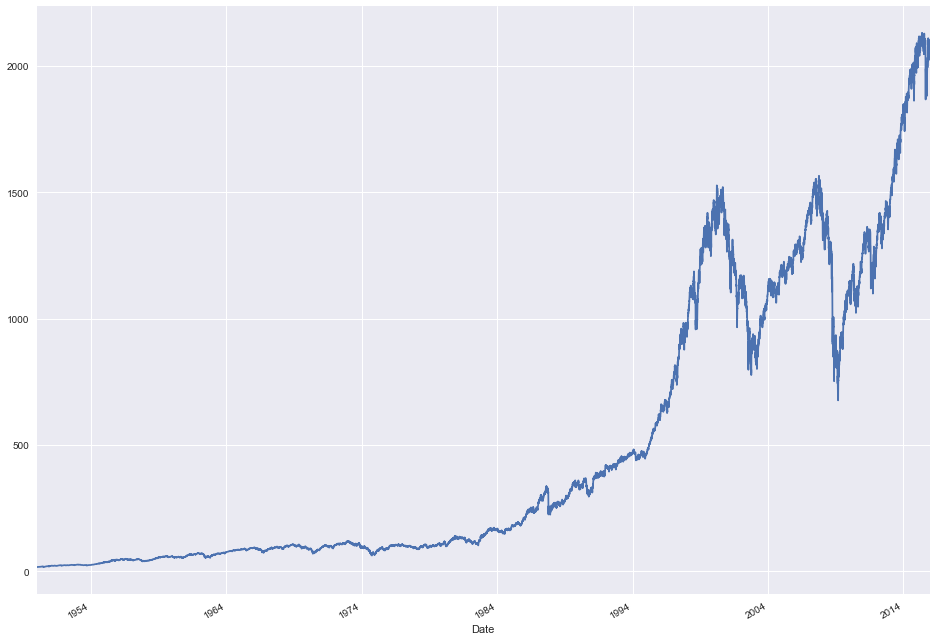

In [5]:
stock_data['Close'].plot(figsize=(16, 12)) 

In [6]:
stock_data['Log_Close']=np.log(stock_data['Close'])

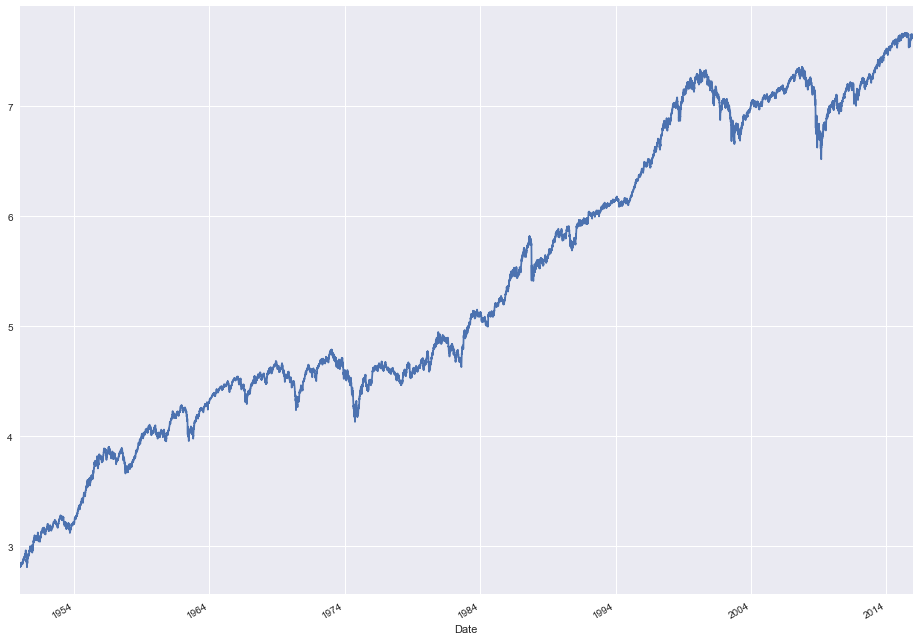

In [7]:
stock_data['Log_Close'].plot(figsize=(16, 12)) 

In [8]:
stock_data=stock_data.assign(avg_close_price_day_5=stock_data['Close'].rolling(5).mean().shift())
stock_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,Log_Close,avg_close_price_day_5
Date,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,2.813011,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,2.824351,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,2.829087,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,2.832036,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,2.837908,NaN
1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,2.834977,16.900
1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,2.838493,16.974
1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,2.818995,17.022
1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,2.813611,16.988


In [9]:
stock_data=stock_data.assign(avg_close_price_day_30=stock_data['Close'].rolling(30).mean().shift())
stock_data=stock_data.assign(avg_close_price_day_365=stock_data['Close'].rolling(365).mean().shift())
stock_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,Log_Close,avg_close_price_day_5,avg_close_price_day_30,avg_close_price_day_365
Date,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,2.813011,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,2.824351,NaN,NaN,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,2.829087,NaN,NaN,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,2.832036,NaN,NaN,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,2.837908,NaN,NaN,NaN
1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,2.834977,16.900,NaN,NaN
1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,2.838493,16.974,NaN,NaN
1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,2.818995,17.022,NaN,NaN
1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,2.813611,16.988,NaN,NaN


In [10]:
stock_data=stock_data.dropna(axis=0)
stock_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,Log_Close,avg_close_price_day_5,avg_close_price_day_30,avg_close_price_day_365
Date,,,,,,,,,,
1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,3.091951,21.800,21.703333,19.447726
1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,3.086943,21.900,21.683000,19.462411
1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,3.080992,21.972,21.659667,19.476274
1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,3.070376,21.960,21.631000,19.489562
1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,3.058238,21.862,21.599000,19.502082
1951-06-26,21.299999,21.299999,21.299999,21.299999,1260000.0,21.299999,3.058707,21.710,21.564333,19.513617
1951-06-27,21.370001,21.370001,21.370001,21.370001,1360000.0,21.370001,3.061988,21.566,21.535000,19.525315
1951-06-28,21.100000,21.100000,21.100000,21.100000,1940000.0,21.100000,3.049273,21.458,21.522000,19.537041
1951-06-29,20.959999,20.959999,20.959999,20.959999,1730000.0,20.959999,3.042616,21.322,21.502333,19.548932


In [11]:
train=stock_data[stock_data.index < datetime(year=2013, month=1, day=1)]
test=stock_data[stock_data.index >= datetime(year=2013, month=1, day=1)]

In [12]:
X_train=train.iloc[:,7:]
y_train=train['Close']
X_test=test.iloc[:,7:]
y_test=test['Close']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, lr_predictions)
mae

16.142439643554408

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test,rf_predictions)
mae

346.61504939634648

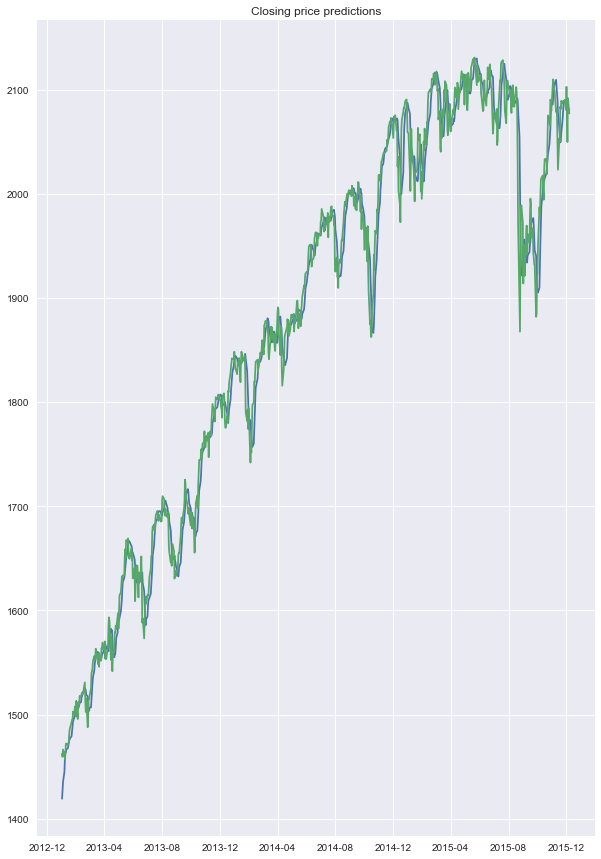

In [15]:
plt.figure(figsize=(10,15))
plt.plot(y_test.index,lr_predictions)
plt.plot(y_test.index,y_test)
plt.title('Closing price predictions')

In [16]:
    stock_data['ratio_avg_close_price_5_365'] = stock_data['avg_close_price_day_5'] / stock_data['avg_close_price_day_365']
    stock_data['std_close_price_day_5'] = stock_data['Close'].rolling(window=5).std().shift()
    stock_data['std_close_price_day_365'] = stock_data['Close'].rolling(window=365).std().shift()
    stock_data['ratio_std_close_price_5_365'] = stock_data['std_close_price_day_5'] / stock_data['std_close_price_day_365']
    stock_data['avg_volume_day_5'] = stock_data['Volume'].rolling(window=5).mean().shift()
    stock_data['avg_volume_day_365'] = stock_data['Volume'].rolling(window=365).mean().shift()
    stock_data['ratio_volume_5_365'] = stock_data['avg_volume_day_5'] / stock_data['avg_volume_day_365']
    stock_data['std_avg_volume_5'] = stock_data['avg_volume_day_5'].rolling(window=5).mean().shift()
    stock_data['std_avg_volume_365'] = stock_data['avg_volume_day_365'].rolling(window=365).mean().shift()
    stock_data['ratio_std_avg_volume_5_365'] = stock_data['std_avg_volume_5'] / stock_data['std_avg_volume_365']

In [17]:
stock_data=stock_data.dropna(axis=0)
train=stock_data[stock_data.index < datetime(year=2013, month=1, day=1)]
test=stock_data[stock_data.index >= datetime(year=2013, month=1, day=1)]

In [18]:
X_train=train.iloc[:,7:]
y_train=train['Close']
X_test=test.iloc[:,7:]
y_test=test['Close']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, lr_predictions)
mae

16.029773809312484

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=150, max_depth=5, min_samples_split=5)
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test,rf_predictions)
mae

366.02876486800642

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #Determing rolling statistics
    rolmean = ts.rolling(window=365).mean()
    rolstd = ts.rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\harshini\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


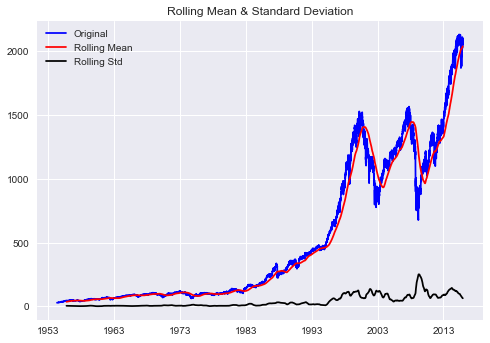

Results of Dickey-Fuller Test:
Test Statistic                     1.699058
p-value                            0.998126
#Lags Used                        43.000000
Number of Observations Used    15451.000000
Critical Value (1%)               -3.430773
Critical Value (5%)               -2.861727
Critical Value (10%)              -2.566870
dtype: float64


In [22]:
test_stationarity(stock_data['Close'])

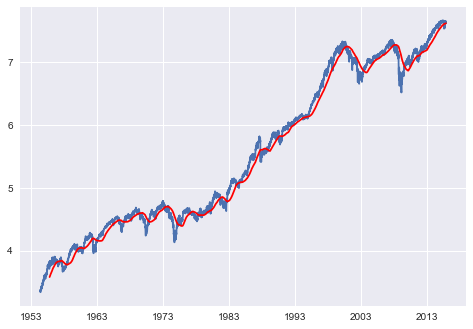

In [23]:
moving_avg = stock_data['Log_Close'].rolling(window=365).mean()
plt.plot(stock_data['Log_Close'])
plt.plot(moving_avg, color='red')
ts_log_moving_avg_diff = stock_data['Log_Close'] - moving_avg

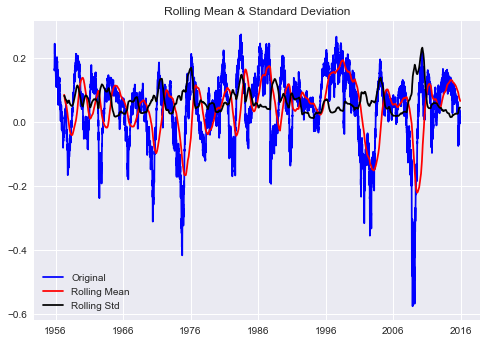

Results of Dickey-Fuller Test:
Test Statistic                -5.728289e+00
p-value                        6.691565e-07
#Lags Used                     3.400000e+01
Number of Observations Used    1.509600e+04
Critical Value (1%)           -3.430783e+00
Critical Value (5%)           -2.861731e+00
Critical Value (10%)          -2.566872e+00
dtype: float64


In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\harshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


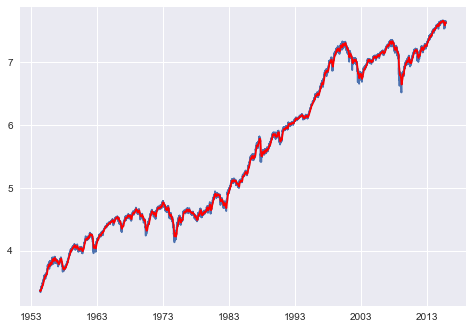

In [25]:
expwighted_avg = pd.stats.moments.ewma(stock_data['Log_Close'],halflife=12)
plt.plot(stock_data['Log_Close'])
plt.plot(expwighted_avg, color='red')

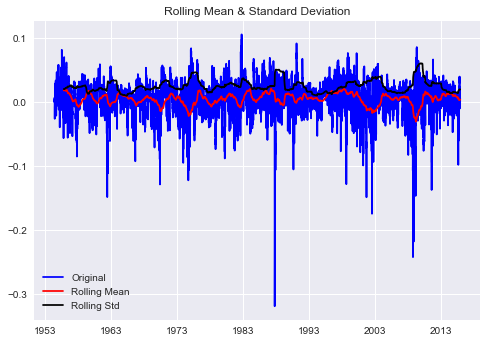

Results of Dickey-Fuller Test:
Test Statistic                -1.492860e+01
p-value                        1.377092e-27
#Lags Used                     3.400000e+01
Number of Observations Used    1.546000e+04
Critical Value (1%)           -3.430773e+00
Critical Value (5%)           -2.861727e+00
Critical Value (10%)          -2.566870e+00
dtype: float64


In [26]:
ts_log_ewma_diff = stock_data['Log_Close'] - expwighted_avg
test_stationarity(ts_log_ewma_diff)

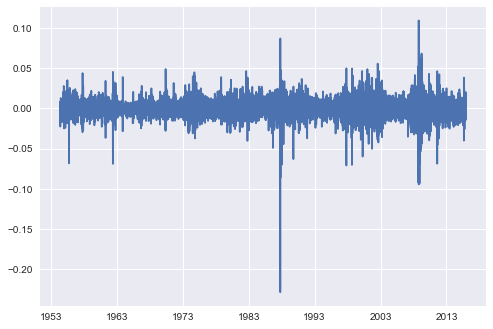

In [27]:
ts_log_diff = stock_data['Log_Close'] - stock_data['Log_Close'].shift()
plt.plot(ts_log_diff)

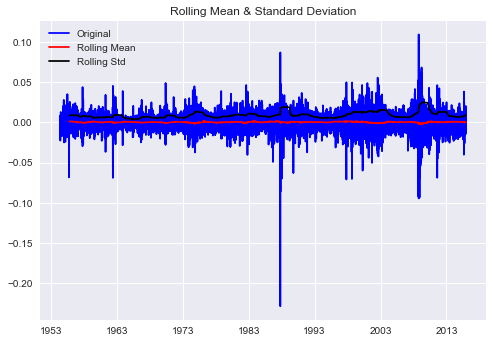

Results of Dickey-Fuller Test:
Test Statistic                   -21.337926
p-value                            0.000000
#Lags Used                        33.000000
Number of Observations Used    15460.000000
Critical Value (1%)               -3.430773
Critical Value (5%)               -2.861727
Critical Value (10%)              -2.566870
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

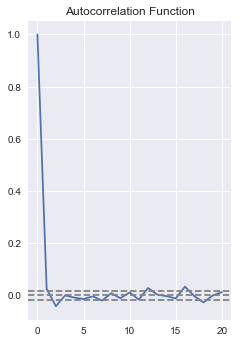

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

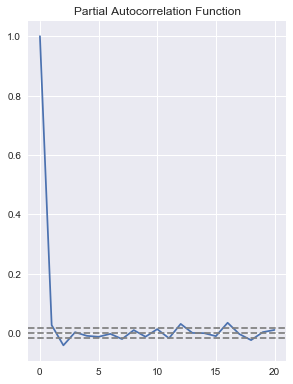

In [30]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [31]:
# p=1;q=2

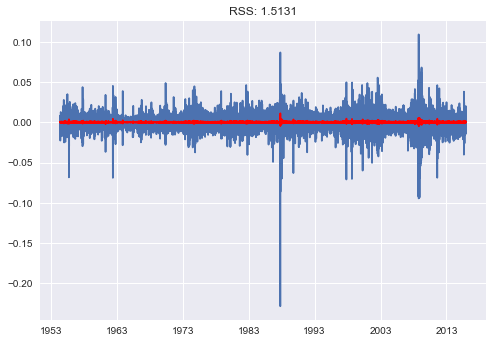

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(stock_data['Log_Close'], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

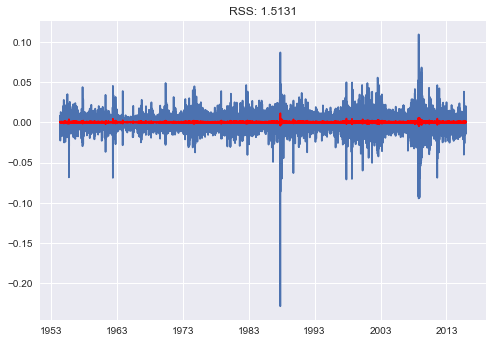

In [33]:
model = ARIMA(stock_data['Log_Close'], order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

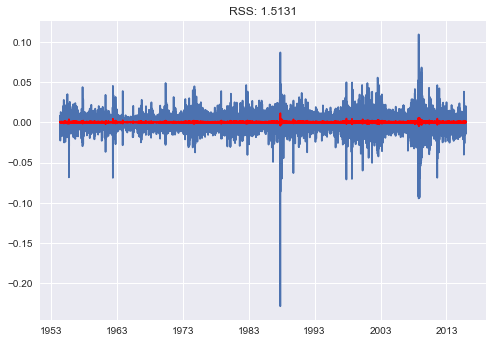

In [34]:
model = ARIMA(stock_data['Log_Close'], order=(1, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [35]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1954-05-21    0.000276
1954-05-24    0.000423
1954-05-25    0.000040
1954-05-26    0.000207
1954-05-27    0.000600
dtype: float64


In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1954-05-21    0.000276
1954-05-24    0.000700
1954-05-25    0.000740
1954-05-26    0.000946
1954-05-27    0.001547
dtype: float64


In [37]:
predictions_ARIMA_log = pd.Series(stock_data['Log_Close'].iloc[0], index=stock_data['Log_Close'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1954-05-20    3.361070
1954-05-21    3.361346
1954-05-24    3.361769
1954-05-25    3.361809
1954-05-26    3.362016
dtype: float64

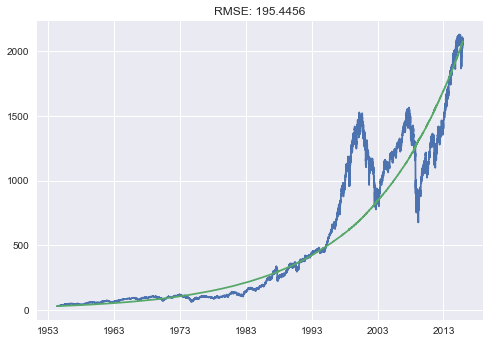

In [40]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(stock_data['Close'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-stock_data['Close'])**2)/len(stock_data['Close'])))